In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt

# Pretty display for notebooks
#%matplotlib inline

In [4]:
Ll = 74.0059
Ls = 75
N = [21, 52, 80, 111, 141, 164, 189, 220, 251, 281, 312, 355]
B = []
#Calculating B for every day mentioned in the homework
for item in N:
    B.append(2*np.pi*(item - 81)/364)



#Calculating EOT for every day mentioned in the homework
EOT = [] 
for x in B:
    EOT.append(9.87*np.sin(2*x) - 7.53*np.cos(x) - 1.5*np.sin(x))


#Calculating delta for every day mentioned in the homework
delta = []
for item in N:
    delta.append(23.45*np.sin(2*np.pi*(item + 284)/365))



In [5]:
#Creating minute data for 24 hours, to be used in the hour calculation

day = []
for i in range(1,24*60+1):
    day.append(i)


In [6]:
#Creating LST for each minute of the 12 days
LST = []
for i in range(0,12): 
    temp = []
    for item in day:
        temp.append(item + 4*(Ls - Ll) + EOT[i])
    LST.append(temp)


In [7]:
hour = []
for i in range(0,12): 
    temp = []
    for item in LST[i]:
        temp.append(15 * (item/60 - 12))
    hour.append(temp)


In [8]:
def final(latitude, delta, hour, LST):
    beta = []
    for i in range(0,12): 
        temp = []
        delt = delta[i]
        for h in hour[i]:
            if ((np.arcsin(np.cos(np.radians(latitude)) * np.cos(np.radians(h)) * np.cos(np.radians(delt)) + np.sin(np.radians(latitude)) * np.sin(np.radians(delt))))*(180/np.pi)) < 0:
                temp.append(0)
            else:
                temp.append((np.arcsin(np.cos(np.radians(latitude)) * np.cos(np.radians(h)) * np.cos(np.radians(delt)) + np.sin(np.radians(latitude)) * np.sin(np.radians(delt))))*(180/np.pi))
        beta.append(temp)
    
    phi = []
    for i in range(0,12): 
        temp = []
        delt = delta[i]
        
        for j in range(0,1440):
            if LST[i][j] < 720:
                temp.append((-np.arccos((np.sin(np.radians(beta[i][j]))*np.sin(np.radians(latitude)) - np.sin(np.radians(delt)))/(np.cos(np.radians(beta[i][j])) * np.cos(np.radians(latitude)))))*(180/np.pi))
            else:
                temp.append((np.arccos((np.sin(np.radians(beta[i][j]))*np.sin(np.radians(latitude)) - np.sin(np.radians(delt)))/(np.cos(np.radians(beta[i][j])) * np.cos(np.radians(latitude)))))*(180/np.pi))
        phi.append(temp)
    fig, ax = plt.subplots()
    ax.plot(phi[0],beta[0],markersize=.1,linewidth=1.3, linestyle="-", label = '21 Jan')
    ax.plot(phi[1],beta[1],markersize=.1,linewidth=1.3, linestyle="-", color = 'b', label = '21 Feb')
    ax.plot(phi[2],beta[2],markersize=.1,linewidth=1.3, linestyle="-", color = 'g', label = '21 Mar')
    ax.plot(phi[3],beta[3],markersize=.1,linewidth=1.3, linestyle="-", color = 'r', label = '21 Apr')
    ax.plot(phi[4],beta[4],markersize=.1,linewidth=1.3, linestyle="-", color = 'c', label = '21 May')
    ax.plot(phi[5],beta[5],markersize=.1,linewidth=1.3, linestyle="-", color = 'm', label = '21 Jun')
    ax.plot(phi[6],beta[6],markersize=.1,linewidth=1.3, linestyle="-", color = 'b', label = '8 July')
    ax.plot(phi[7],beta[7],markersize=.1,linewidth=1.3, linestyle="-", color = 'y', label = '8 Aug')
    ax.plot(phi[8],beta[8],markersize=.1,linewidth=1.3, linestyle="-", color = 'k', label = '8 Sep')
    ax.plot(phi[9],beta[9],markersize=.1,linewidth=1.3, linestyle="-", color = '0.2', label = '8 Oct')
    ax.plot(phi[10],beta[10],markersize=.1,linewidth=1.3, linestyle="-", color = '0.5', label = '8 Nov')
    ax.plot(phi[11],beta[11],markersize=.1,linewidth=1.3, linestyle="-", color = '0.75', label = '8 Dec')
    legend = ax.legend(loc='upper right', shadow=True)
    ax.set_ylim([0, 100])
    ax.set_xlim([-130, 130])
    plt.ylabel('Alttude Angle (Beta)')
    plt.xlabel('Azimuth Angle (Phi)')
    plt.rcParams["figure.figsize"] = [20,9]
    plt.show()
    print np.mean(beta[5][319:1122])
    
    
    

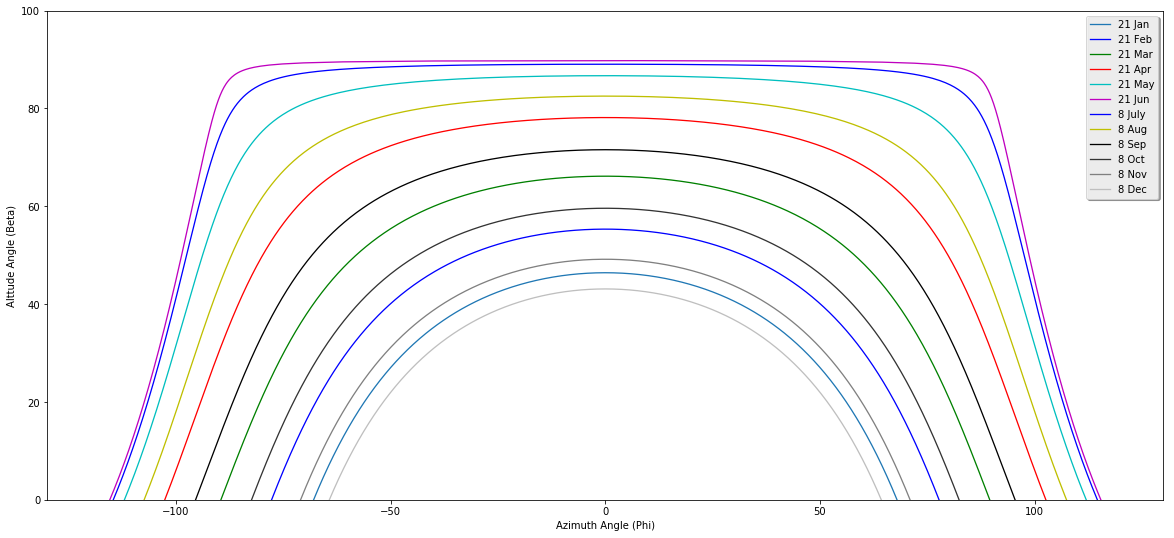

44.4660303487


In [10]:
final(23.45,delta,hour,LST)  # input the latitude here. in the first argument